In [34]:
import numpy as np
import pandas as pd

import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import scale, StandardScaler

from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, KFold

from sklearn import linear_model
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import f1_score

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_score, recall_score, mean_squared_error, r2_score, roc_auc_score, roc_curve

#import shap
from sklearn.decomposition import PCA

import warnings
warnings.filterwarnings('ignore')

from IPython.display import Image

In [2]:
import os
print(os.getcwd())

C:\Users\amirf\Downloads


In [77]:
hospital_table_1 = pd.read_excel("corona_hospitalization.xlsx",parse_dates=['Date'], index_col='Date')
#selected_columns = ['respirated', 'respirated women percentage', 'respirated average age', 'respirated age st dev', 'non vaccinated respirated percentage']
#hospital_table[selected_columns].info()
hospital_table_1.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1458 entries, 2020-03-11 to 2024-03-07
Data columns (total 25 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   hospitalized                    1458 non-null   int64  
 1   % hospitalized women            1458 non-null   float64
 2   avg age hospitalized            1458 non-null   float64
 3   SD age hospitalized             1458 non-null   float64
 4   respirated                      1458 non-null   object 
 5   % women on a respirator         1450 non-null   float64
 6   avg age on a respirator         1458 non-null   float64
 7   SD age on a respirator          1458 non-null   float64
 8   % unvaccinated on a respirator  1413 non-null   float64
 9   mild sick                       1458 non-null   int64  
 10  %mild sick women                1458 non-null   float64
 11  % mild sick unvaccinated        1458 non-null   float64
 12  avg mild sick   

In [78]:
#hospital_table["respirated"].head(20)
hospital_table_1.head(20)
#hospital_table["respirated"].tail(20)

,hospitalized,% hospitalized women,avg age hospitalized,SD age hospitalized,respirated,% women on a respirator,avg age on a respirator,SD age on a respirator,% unvaccinated on a respirator,mild sick,...,% women moderate sick,unvaccinated moderate sick,avg age moderate sick,sd age moderate sick,critical sick,% critical sick women,% unvaccinated critical sick,avg age critical sick,sd age critical sick,sum over time of critical sick
Date,,,,,,,,,,,,,,,,,,,,,
2020-03-11,79,45.6,47.8,18.1,<15,40.0,63.8,15.3,100.0,72,...,NaN,NaN,NaN,NaN,<15,50.0,100.0,67.3,16.2,<15
2020-03-12,102,49.0,49.9,18.2,<15,40.0,63.8,15.3,100.0,95,...,NaN,NaN,NaN,NaN,<15,50.0,100.0,67.3,16.2,<15
2020-03-13,120,47.5,49.2,18.4,<15,40.0,63.8,15.3,100.0,109,...,40.0,100.0,68.0,16.7,<15,50.0,100.0,67.3,16.2,<15
2020-03-14,158,49.4,47.4,18.5,<15,NaN,70.3,7.4,100.0,148,...,40.0,100.0,68.0,16.7,<15,20.0,100.0,76.8,10.3,<15
2020-03-15,197,51.8,46.5,18.7,<15,20.0,74.0,7.6,100.0,183,...,50.0,100.0,61.3,17.5,<15,37.5,100.0,79.0,9.1,<15
2020-03-16,215,51.2,46.6,18.8,<15,16.7,74.7,7.0,100.0,200,...,60.0,100.0,58.0,17.3,<15,30.0,100.0,77.9,8.6,<15
2020-03-17,250,51.6,47.8,19.6,<15,16.7,74.7,7.0,100.0,233,...,50.0,100.0,54.7,17.5,<15,27.3,100.0,76.8,8.9,<15
2020-03-18,302,49.0,47.6,19.6,<15,16.7,74.7,7.0,100.0,276,...,27.3,100.0,58.5,15.3,15,26.7,100.0,74.4,10.1,17
2020-03-19,290,48.6,48.6,20.1,<15,36.4,70.4,13.1,90.9,259,...,27.3,100.0,59.7,14.3,20,35.0,95.0,72.1,12.5,22


In [79]:
hospital_table_1.dtypes

hospitalized                        int64
% hospitalized women              float64
avg age hospitalized              float64
SD age hospitalized               float64
respirated                         object
% women on a respirator           float64
avg age on a respirator           float64
SD age on a respirator            float64
% unvaccinated on a respirator    float64
mild sick                           int64
%mild sick women                  float64
% mild sick unvaccinated          float64
avg mild sick                     float64
sd mild sick                      float64
moderate sick                      object
% women moderate sick             float64
unvaccinated moderate sick        float64
avg age moderate sick             float64
sd age moderate sick              float64
critical sick                      object
% critical sick women             float64
% unvaccinated critical sick      float64
avg age critical sick             float64
sd age critical sick              

In [148]:
# how many rows under 'respirated' column are with values < or >?
#count = hospital_table_1['respirated'].str.contains('<|>', regex=True).sum()
#print(f"Number of rows with '<' or '>': {count}")

In [147]:
# how many rows under 'respirated' column are with values < 15?
#count = hospital_table_1['respirated'].str.contains('<15', regex=True).sum()
#print(f"Number of rows with '<' or '>': {count}")

In [115]:
# what values can be found in column 'respirated'?

#unique_res_counts = filtered_rows['respirated'].dropna().value_counts()
#print(unique_res_counts)

# Attempt to convert 'respirated' values to numeric where possible
#hospital_table_1['respirated_numeric'] = pd.to_numeric(hospital_table['respirated'], errors='coerce')

# Count unique values for both original and numeric versions
#unique_res_counts = hospital_table_1['respirated'].dropna().value_counts()
#unique_numeric_counts = hospital_table_1['respirated_numeric'].dropna().value_counts()

#print("All unique values in 'respirated':")
#print(unique_res_counts)
#print("\nNumeric unique values in 'respirated':")
#print(unique_numeric_counts)

In [149]:
# for each of the 260 rows above, which I will fileter, which unique values exist 
#for column "non vaccinated respirated percentage? are they all 100%?

# Filter rows where 'respirated' contains '<15'
#filtered_rows = hospital_table_1[hospital_table_1['respirated'].str.contains('<15',na=False)]

# Get unique values and their counts for 'non vaccinated respirated percentage' in the filtered rows
#unique_counts = filtered_rows['non vaccinated respirated percentage'].value_counts()

#print(unique_counts)

In [10]:
# check missing values
#hospital_table[selected_columns].isnull().sum()

In [11]:
# which rows on 'respirated women percentage' are null?
#null_rows_RWP = hospital_table[hospital_table['respirated women percentage'].isnull()]
#print(null_rows_RWP)

In [13]:
#zero_rows_RWP = hospital_table[hospital_table['respirated women percentage']==0]
#print(zero_rows_RWP)

In [85]:
# which rows on 'non vaccinated respirated percentage' are null?
#null_rows_NVRP = hospital_table_1[hospital_table_1['non vaccinated respirated percentage'].isnull()]
#print(null_rows_NVRP)

In [ ]:
#zero_rows_NVRP = hospital_table_1[hospital_table_1['non vaccinated respirated percentage']==0]
#print(zero_rows_NVRP)

In [150]:
hospital_table_2=hospital_table_1.fillna(0)
hospital_table_2.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1458 entries, 2020-03-11 to 2024-03-07
Data columns (total 26 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   hospitalized                    1458 non-null   int64  
 1   % hospitalized women            1458 non-null   float64
 2   avg age hospitalized            1458 non-null   float64
 3   SD age hospitalized             1458 non-null   float64
 4   respirated                      1458 non-null   object 
 5   % women on a respirator         1458 non-null   float64
 6   avg age on a respirator         1458 non-null   float64
 7   SD age on a respirator          1458 non-null   float64
 8   % unvaccinated on a respirator  1458 non-null   float64
 9   mild sick                       1458 non-null   int64  
 10  %mild sick women                1458 non-null   float64
 11  % mild sick unvaccinated        1458 non-null   float64
 12  avg mild sick   

In [152]:
# Function to convert "<15" to a random integer between 0 and 14

# the 1st function option is for just random numbers between 0-14. we won't use it.
#def convert_less_than_15(value):
 #   if value == "<15":
 #       return np.random.randint(0, 15)  # Generates a random integer from 0 to 14
  #  return value  # In case there are other values, return them unchanged

# the 2nd function is for  random numbers between 0-14 in a NORMAL distribution, which we prefer for this data.
def convert_less_than_15(value):
    if value == "<15":
        mean = 7  # change mean if needed
        std_dev = 3  # change standard deviation if needed
        # Generate a random number from a normal distribution
        random_value = int(np.random.normal(mean, std_dev))
        # Ensure the value is within the desired range (0 to 14)
        return max(0, min(14, random_value))
    return value  # Return other values unchanged


# Apply the function to the 'respirated' column
hospital_table_2['respirated'] = hospital_table_2['respirated'].apply(convert_less_than_15)

# Apply the function to the 'moderate sick' column
hospital_table_2['moderate sick'] = hospital_table_2['moderate sick'].apply(convert_less_than_15)

# Apply the function to the 'critical sick' column
hospital_table_2['critical sick'] = hospital_table_2['critical sick'].apply(convert_less_than_15)




# Display the DataFrame
hospital_table_2["respirated"].head(20)
#print(new_table)


# Display the DataFrame

hospital_table_2.loc[:,['respirated', 'moderate sick', 'critical sick', 'sum over time of critical sick']].head(10)
#print(hospital_table_2)
#hospital_table_2.loc[:,['respirated', 'moderate sick', 'critical sick', 'sum over time of critical sick']].tail(50)

,respirated,moderate sick,critical sick,sum over time of critical sick
Date,,,,
2020-03-11,4,0,11,<15
2020-03-12,5,0,4,<15
2020-03-13,0,6,8,<15
2020-03-14,2,5,4,<15
2020-03-15,4,7,9,<15
2020-03-16,7,3,8,<15
2020-03-17,5,6,7,<15
2020-03-18,4,11,15,17
2020-03-19,5,5,20,22


In [119]:
result = hospital_table_2.loc[hospital_table_2['respirated'] == '<15']
print(result)

Empty DataFrame
Columns: [hospitalized, % hospitalized women, avg age hospitalized, SD age hospitalized, respirated, % women on a respirator, avg age on a respirator, SD age on a respirator, % unvaccinated on a respirator, mild sick, %mild sick women, % mild sick unvaccinated, avg mild sick, sd mild sick, moderate sick, % women moderate sick, unvaccinated moderate sick, avg age moderate sick, sd age moderate sick, critical sick, % critical sick women, % unvaccinated critical sick, avg age critical sick, sd age critical sick, sum over time of critical sick, respirated_numeric]
Index: []

[0 rows x 26 columns]


In [141]:
# for column "% unvaccinated on a respirator" - make all values 100% for year 2020 (since there were no vaccinations until end of 2020).


# Ensure the index is in datetime format
hospital_table_2.index = pd.to_datetime(hospital_table_2.index, format='%d-%m-%Y')

# Update the column "% unvaccinated on a respirator" for the year 2020
hospital_table_2.loc[hospital_table_2.index.year == 2020, '% unvaccinated on a respirator'] = 100

In [145]:
hospital_table_2.head(20)

,hospitalized,% hospitalized women,avg age hospitalized,SD age hospitalized,respirated,% women on a respirator,avg age on a respirator,SD age on a respirator,% unvaccinated on a respirator,mild sick,...,unvaccinated moderate sick,avg age moderate sick,sd age moderate sick,critical sick,% critical sick women,% unvaccinated critical sick,avg age critical sick,sd age critical sick,sum over time of critical sick,respirated_numeric
Date,,,,,,,,,,,,,,,,,,,,,
2020-03-11,79,45.6,47.8,18.1,7.0,40.0,63.8,15.3,100.0,72.0,...,0.0,0.0,0.0,6.0,50.0,100.0,67.3,16.2,<15,0.0
2020-03-12,102,49.0,49.9,18.2,2.0,40.0,63.8,15.3,100.0,95.0,...,0.0,0.0,0.0,1.0,50.0,100.0,67.3,16.2,<15,0.0
2020-03-13,120,47.5,49.2,18.4,8.0,40.0,63.8,15.3,100.0,109.0,...,100.0,68.0,16.7,3.0,50.0,100.0,67.3,16.2,<15,0.0
2020-03-14,158,49.4,47.4,18.5,12.0,0.0,70.3,7.4,100.0,148.0,...,100.0,68.0,16.7,10.0,20.0,100.0,76.8,10.3,<15,0.0
2020-03-15,197,51.8,46.5,18.7,6.0,20.0,74.0,7.6,100.0,183.0,...,100.0,61.3,17.5,8.0,37.5,100.0,79.0,9.1,<15,0.0
2020-03-16,215,51.2,46.6,18.8,8.0,16.7,74.7,7.0,100.0,200.0,...,100.0,58.0,17.3,10.0,30.0,100.0,77.9,8.6,<15,0.0
2020-03-17,250,51.6,47.8,19.6,6.0,16.7,74.7,7.0,100.0,233.0,...,100.0,54.7,17.5,7.0,27.3,100.0,76.8,8.9,<15,0.0
2020-03-18,302,49.0,47.6,19.6,0.0,16.7,74.7,7.0,100.0,276.0,...,100.0,58.5,15.3,15.0,26.7,100.0,74.4,10.1,17,0.0
2020-03-19,290,48.6,48.6,20.1,4.0,36.4,70.4,13.1,100.0,259.0,...,100.0,59.7,14.3,20.0,35.0,95.0,72.1,12.5,22,0.0


In [146]:
hospital_table_2["% unvaccinated on a respirator"].tail(15)

Date
2024-02-22    25.0
2024-02-23    28.6
2024-02-24    28.6
2024-02-25    25.0
2024-02-26    21.4
2024-02-27    23.1
2024-02-28    20.0
2024-02-29    20.0
2024-03-01    11.1
2024-03-02    13.3
2024-03-03    12.5
2024-03-04    15.4
2024-03-05    14.3
2024-03-06     9.1
2024-03-07     9.1
Name: % unvaccinated on a respirator, dtype: float64

In [135]:
# turn object type columns into float type
hospital_table_2['respirated'] = hospital_table_2['respirated'].astype(float)
hospital_table_2['mild sick'] = hospital_table_2['mild sick'].astype(float)
hospital_table_2['moderate sick'] = hospital_table_2['moderate sick'].astype(float)
hospital_table_2['critical sick'] = hospital_table_2['critical sick'].astype(float)

In [136]:
# Creating a new df without some of the columns

#hospital_table_3 = hospital_table_2.filter(['hospitalized','mild sick','moderate sick'])
hospital_table_3 = hospital_table_2.drop(['SD age hospitalized','SD age on a respirator','sd mild sick', 'sum over time of critical sick', 'sd age critical sick', 'sd age moderate sick','respirated_numeric'], axis=1)


print(hospital_table_3.dtypes)  # To check the data types

hospitalized                        int64
% hospitalized women              float64
avg age hospitalized              float64
respirated                        float64
% women on a respirator           float64
avg age on a respirator           float64
% unvaccinated on a respirator    float64
mild sick                         float64
%mild sick women                  float64
% mild sick unvaccinated          float64
avg mild sick                     float64
moderate sick                     float64
% women moderate sick             float64
unvaccinated moderate sick        float64
avg age moderate sick             float64
critical sick                     float64
% critical sick women             float64
% unvaccinated critical sick      float64
avg age critical sick             float64
dtype: object


In [153]:
hospital_table_3.to_csv('hospital_table_3.csv')

In [137]:
# Correlation for numerical features
data_numerical = hospital_table_3[['hospitalized', 'mild sick','moderate sick','critical sick']]
correlation_matrix_numerical = data_numerical.corr()
correlation_matrix_numerical
# -1 is also high corr - but negative
# no corr = 0
# there's no statistical test here yet

,hospitalized,mild sick,moderate sick,critical sick
hospitalized,1.000000,0.880055,0.890681,0.906706
mild sick,0.880055,1.000000,0.622248,0.601990
moderate sick,0.890681,0.622248,1.000000,0.921878
critical sick,0.906706,0.601990,0.921878,1.000000


In [139]:
hospital_table_3.describe().round(0)

,hospitalized,% hospitalized women,avg age hospitalized,respirated,% women on a respirator,avg age on a respirator,% unvaccinated on a respirator,mild sick,%mild sick women,% mild sick unvaccinated,avg mild sick,moderate sick,% women moderate sick,unvaccinated moderate sick,avg age moderate sick,critical sick,% critical sick women,% unvaccinated critical sick,avg age critical sick
count,1458.0,1458.0,1458.0,1458.0,1458.0,1458.0,1458.0,1458.0,1458.0,1458.0,1458.0,1458.0,1458.0,1458.0,1458.0,1458.0,1458.0,1458.0,1458.0
mean,655.0,48.0,67.0,74.0,40.0,66.0,53.0,342.0,51.0,45.0,64.0,75.0,45.0,47.0,68.0,238.0,44.0,50.0,70.0
std,581.0,3.0,6.0,74.0,11.0,6.0,34.0,296.0,4.0,31.0,8.0,80.0,13.0,34.0,12.0,275.0,8.0,34.0,5.0
min,40.0,33.0,46.0,0.0,0.0,50.0,0.0,28.0,37.0,8.0,45.0,0.0,0.0,0.0,0.0,0.0,20.0,0.0,56.0
25%,240.0,46.0,63.0,19.0,34.0,64.0,22.0,145.0,48.0,19.0,59.0,17.0,40.0,18.0,65.0,48.0,41.0,20.0,67.0
50%,456.0,48.0,67.0,41.0,40.0,67.0,40.0,292.0,50.0,28.0,64.0,39.0,46.0,34.0,70.0,106.0,44.0,34.0,70.0
75%,896.0,50.0,71.0,110.0,44.0,70.0,88.0,412.0,53.0,71.0,70.0,117.0,50.0,76.0,74.0,334.0,47.0,84.0,74.0
max,3345.0,60.0,76.0,324.0,80.0,82.0,100.0,1981.0,65.0,100.0,77.0,351.0,100.0,100.0,93.0,1214.0,73.0,100.0,80.0


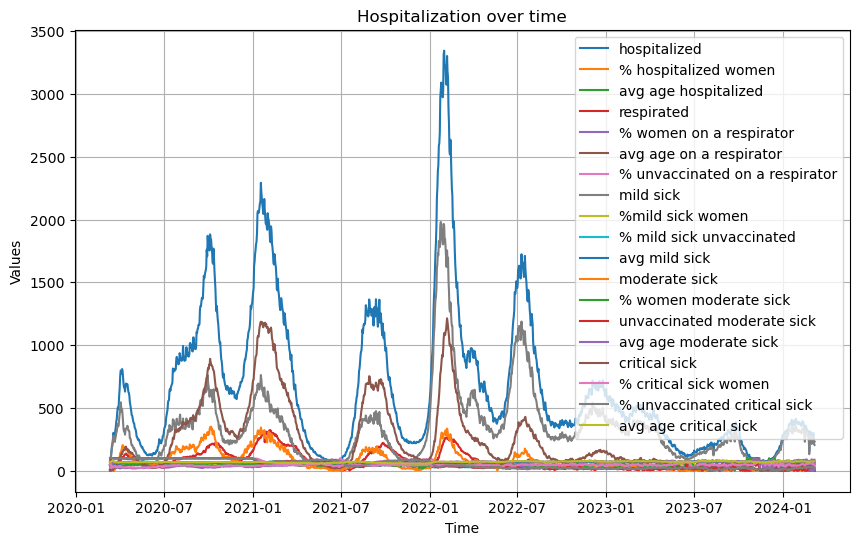

In [140]:
# visualization of all features

plt.figure(figsize=(10, 6))
for column in hospital_table_3.columns:
    plt.plot(hospital_table_3.index, hospital_table_3[column], label=column)

plt.title('Hospitalization over time')
plt.xlabel('Time')
plt.ylabel('Values')
plt.legend()
plt.grid()
plt.show()

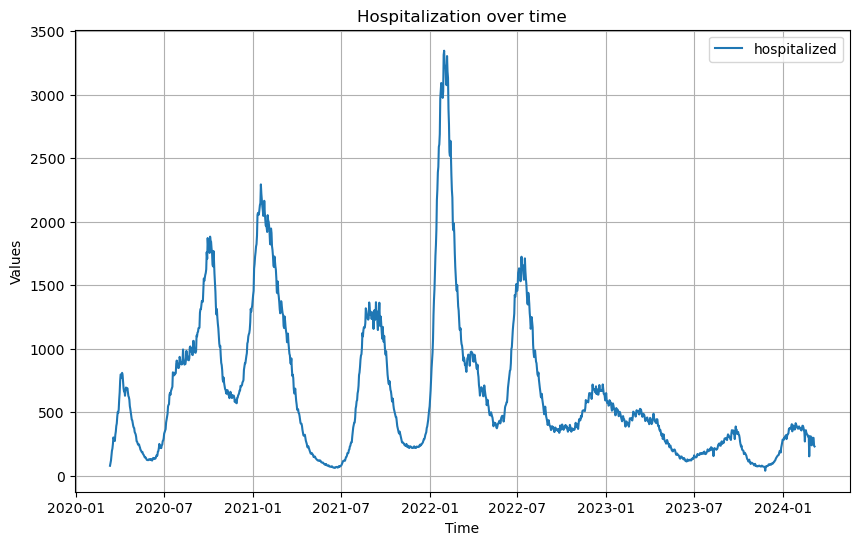

In [165]:
# visualization - 1 feature

plt.figure(figsize=(10, 6))
plt.plot(hospital_table_3.index, hospital_table_3["hospitalized"], label="hospitalized")

plt.title('Hospitalization over time')
plt.xlabel('Time')
plt.ylabel('Values')
plt.legend()
plt.grid()
plt.show()

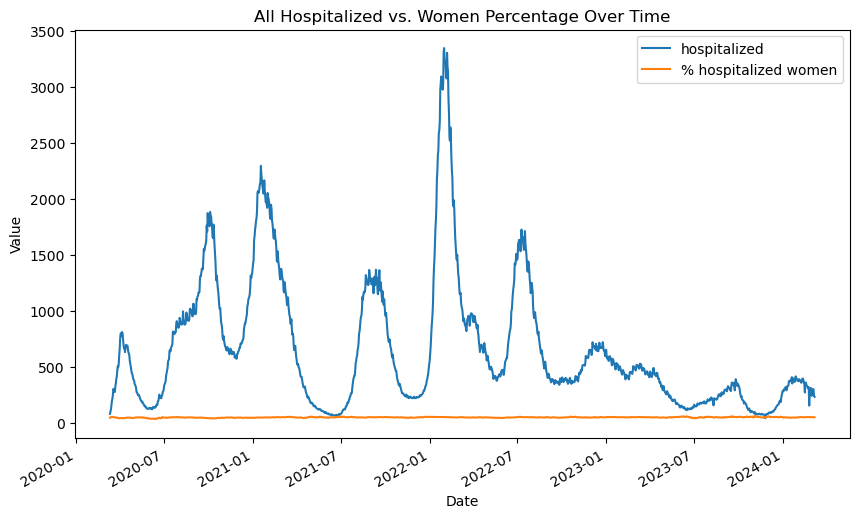

In [178]:
# visualization of 2 features

# Select the two features you want to plot
feature1 = 'hospitalized'
feature2 = '% hospitalized women'

# Create the plot
fig, ax = plt.subplots(figsize=(10, 6))

# Plot the first feature
ax.plot(hospital_table_3.index, hospital_table_3[feature1], label=feature1)

# Plot the second feature
ax.plot(hospital_table_3.index, hospital_table_3[feature2], label=feature2)

# Customize the plot
plt.title('All Hospitalized vs. Women Percentage Over Time')
plt.xlabel('Date')
plt.ylabel('Value')

# Rotate and align the tick labels so they look better
fig.autofmt_xdate()

# Use a legend to show which line is which
plt.legend()

# Display the plot
plt.show()

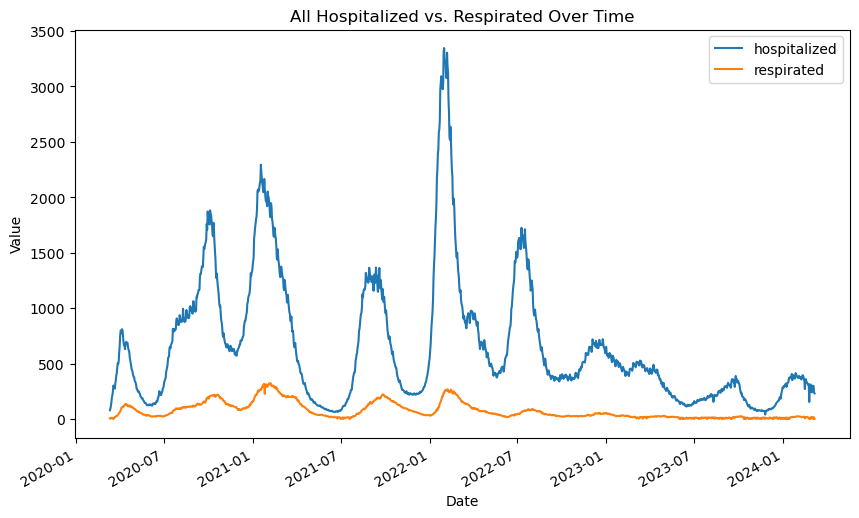

In [180]:
# visualization of 2 features

# Select the two features you want to plot
feature1 = 'hospitalized'
feature2 = 'respirated'

# Create the plot
fig, ax = plt.subplots(figsize=(10, 6))

# Plot the first feature
ax.plot(hospital_table_3.index, hospital_table_3[feature1], label=feature1)

# Plot the second feature
ax.plot(hospital_table_3.index, hospital_table_3[feature2], label=feature2)

# Customize the plot
plt.title('All Hospitalized vs. Respirated Over Time')
plt.xlabel('Date')
plt.ylabel('Value')

# Rotate and align the tick labels so they look better
fig.autofmt_xdate()

# Use a legend to show which line is which
plt.legend()

# Display the plot
plt.show()

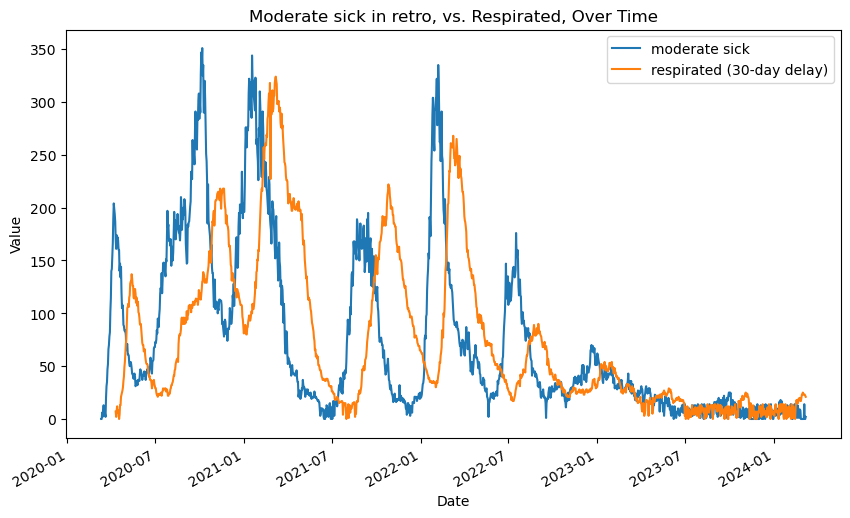

In [185]:
# visualization of 2 features, one of them delayed in time

# Select the two features you want to plot
feature1 = 'moderate sick'
feature2 = 'respirated'

# Create the plot
fig, ax = plt.subplots(figsize=(10, 6))

# Plot the first feature
ax.plot(hospital_table_3.index, hospital_table_3[feature1], label=feature1)

# Plot the second feature with 30 days delay
ax.plot(hospital_table_3.index[30:], hospital_table_3[feature2][:-30], label=f'{feature2} (30-day delay)')

# Customize the plot
plt.title('Moderate sick in retro, vs. Respirated, Over Time')
plt.xlabel('Date')
plt.ylabel('Value')

# Rotate and align the tick labels so they look better
fig.autofmt_xdate()

# Use a legend to show which line is which
plt.legend()

# Display the plot
plt.show()

In [186]:
# adding columns of time categories to the date index - month and years

hospital_table_3['month'] = hospital_table_3.index.month
hospital_table_3['year'] = hospital_table_3.index.year   
hospital_table_3.head()

,hospitalized,% hospitalized women,avg age hospitalized,respirated,% women on a respirator,avg age on a respirator,% unvaccinated on a respirator,mild sick,%mild sick women,% mild sick unvaccinated,...,moderate sick,% women moderate sick,unvaccinated moderate sick,avg age moderate sick,critical sick,% critical sick women,% unvaccinated critical sick,avg age critical sick,month,year
Date,,,,,,,,,,,,,,,,,,,,,
2020-03-11,79,45.6,47.8,7.0,40.0,63.8,100.0,72.0,45.8,100.0,...,0.0,0.0,0.0,0.0,6.0,50.0,100.0,67.3,3,2020
2020-03-12,102,49.0,49.9,2.0,40.0,63.8,100.0,95.0,49.5,100.0,...,0.0,0.0,0.0,0.0,1.0,50.0,100.0,67.3,3,2020
2020-03-13,120,47.5,49.2,8.0,40.0,63.8,100.0,109.0,47.7,100.0,...,6.0,40.0,100.0,68.0,3.0,50.0,100.0,67.3,3,2020
2020-03-14,158,49.4,47.4,12.0,0.0,70.3,100.0,148.0,50.7,100.0,...,2.0,40.0,100.0,68.0,10.0,20.0,100.0,76.8,3,2020
2020-03-15,197,51.8,46.5,6.0,20.0,74.0,100.0,183.0,52.5,100.0,...,10.0,50.0,100.0,61.3,8.0,37.5,100.0,79.0,3,2020


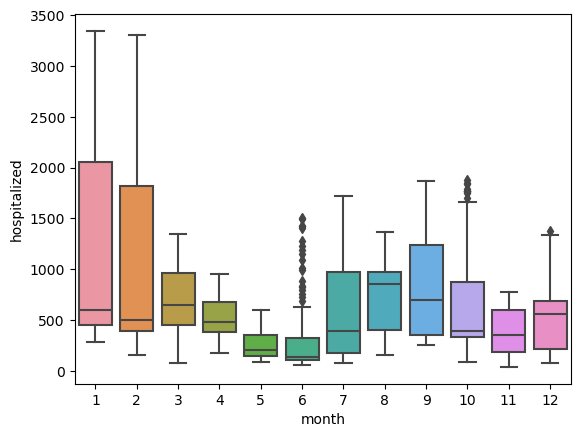

In [187]:
# visuallizing the above month category for hospitalizations over the years

sns.boxplot(x="month", y="hospitalized", data=hospital_table_3);

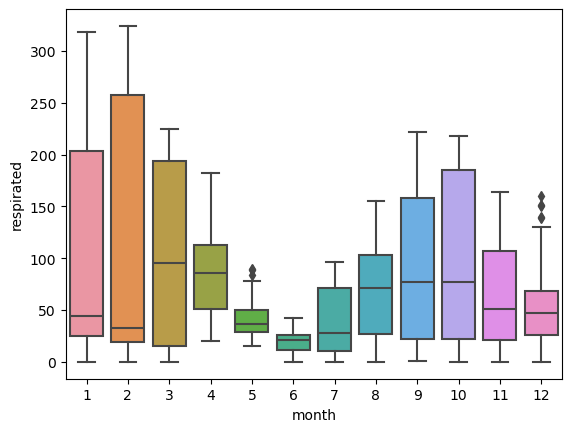

In [188]:
# visuallizing the above month category for respirations over the years

sns.boxplot(x="month", y="respirated", data=hospital_table_3);

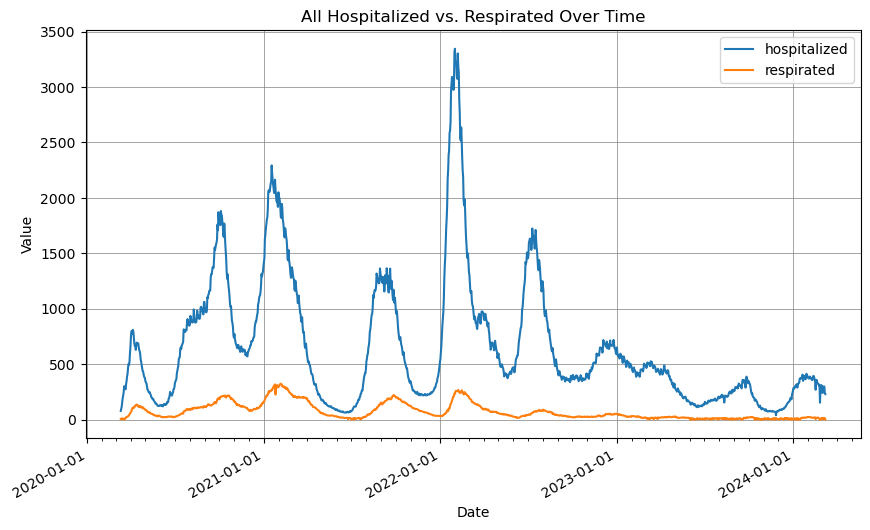

In [189]:
# visualization of 2 features, this time with month Januray "highlighted"

import matplotlib.dates as mdates

# Select the two features you want to plot
feature1 = 'hospitalized'
feature2 = 'respirated'

# Create the plot
fig, ax = plt.subplots(figsize=(10, 6))

# Plot the first feature
ax.plot(hospital_table_3.index, hospital_table_3[feature1], label=feature1)

# Plot the second feature
ax.plot(hospital_table_3.index, hospital_table_3[feature2], label=feature2)

# Customize the plot
plt.title('All Hospitalized vs. Respirated Over Time')
plt.xlabel('Date')
plt.ylabel('Value')

# Set major locator to show ticks on January 1st
ax.xaxis.set_major_locator(mdates.YearLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))

# Set minor locator to show ticks on first day of each month
ax.xaxis.set_minor_locator(mdates.MonthLocator())

# Add grid for January only
ax.grid(which='major', color='gray', linestyle='-', linewidth=0.5)

# Rotate and align the tick labels so they look better
fig.autofmt_xdate()

# Use a legend to show which line is which
plt.legend()

# Display the plot
plt.show()